# Importing Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import os

# MNIST Dataset

## Importing Dataset

In [ ]:
trainset, testset = keras.datasets.mnist.load_data()
X_train, y_train = trainset
X_test , y_test = testset

11501568/11490434 [==============================] - 0s 0us/step


## Exploratory Data Analysis

In [ ]:
print("X_train_shape {0}".format(X_train.shape))
print("y_train shape {0}".format(y_train.shape))
print("X_test shape {0}".format(X_test.shape))
print("y_test shape {0}".format(y_test.shape))

X_train_shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
import random
%matplotlib inline

def plot_dataset(data_X = None, data_Y = None ,rows=3,cols=3, train= True):
    fig, axes = plt.subplots(rows,cols,figsize = (rows**2,cols**2))

    if train:
        fig.suptitle("------TRAIN-SET-------")
    else:
        fig.suptitle("------TESTING-SET-------")
    for i in range(rows):
        for j in range(cols):
            ax = axes[i][j]
            ind = random.randint(0,data_X.shape[0])
            ax.imshow(data_X[ind],cmap='gray')
            ax.set_title(data_Y[ind], fontsize = 20)

### Plotting Train Dataset

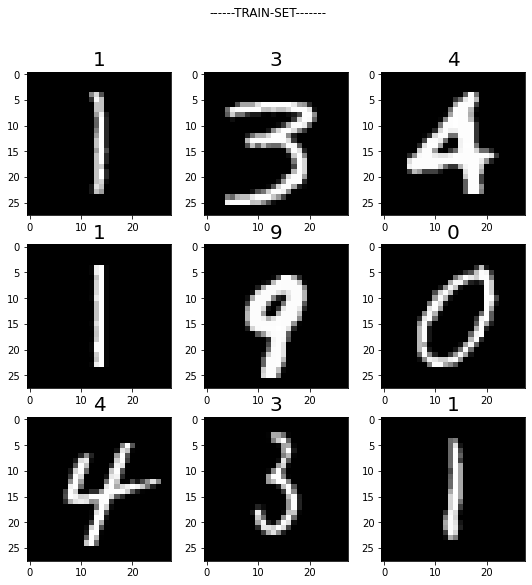

In [ ]:
plot_dataset(X_train, y_train, 3,3)

### Plotting Test Dataset

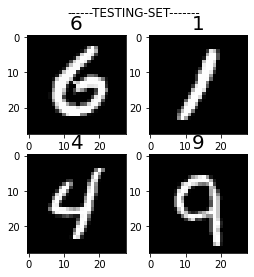

In [ ]:
plot_dataset(X_test, y_test, 2,2, False)

## Model Architectures

### Model Architecture 1 

In [ ]:
def get_model_32(input_shape = (28,28,1)):
    
    model = keras.models.Sequential([

        ## Convolution Layer 1 
        keras.layers.Input(input_shape),
        keras.layers.Conv2D(
                            filters=32,
                            kernel_size=(5,5),
                            strides=(1,1),
                            padding='valid',
                            activation='relu'),
        ## Max Pooling Layer 1
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='valid'),
        
        
        ## Flatten
        keras.layers.Flatten(),
        
        ## Dense Layer (100 Units)
        keras.layers.Dense(units=100,
                           activation='relu'),
        
        ## Final Output
        keras.layers.Dense(units=10,
        activation='softmax')

    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [ ]:
model_32 = get_model_32()
model_32.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

### Model Architecture 2

In [ ]:
def get_model_32_32(input_shape = (28,28,1)):
    
    model = keras.models.Sequential([

        ## input shape
        keras.layers.Input(input_shape),

        ## Convolution 1 (32 Filters)
        keras.layers.Conv2D(
                            filters=32,
                            kernel_size=(3,3),
                            strides=(1,1),
                            padding='valid',
                            activation='relu'),
        ## Max Pooling Layer 1
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='valid'),


        ## Convolution 2 (32 Filters)
        keras.layers.Conv2D(
                            filters=32,
                            kernel_size=(3,3),
                            strides=(1,1),
                            padding='valid',
                            activation='relu'),

        ## Max Pooling Layer 2
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='valid'),
        

        ## Flatten Output
        keras.layers.Flatten(),

        ## Dense Layer (100 Units)
        keras.layers.Dense(units=100,
                           activation='relu'),
        
        ## Final Output Layer
        keras.layers.Dense(units=10,
                            activation='softmax')

    ])

    model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [ ]:
model_32_32 = get_model_32_32()
model_32_32.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 100)              

### Model Architecture 3

In [ ]:
def get_model_Le_net(input_shape = (28,28,1)):
    
    model = keras.models.Sequential([
        ## Input Shape
        keras.layers.Input(input_shape),

        ## Convolution Layer 1
        keras.layers.Conv2D(
                            filters=6,
                            kernel_size=(5,5),
                            strides=(1,1),
                            padding='same',
                            activation='tanh'),

        ## Max Pooling
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='same'),

        ## Convolution Layer 2
        keras.layers.Conv2D(
                            filters=16,
                            kernel_size=(5,5),
                            strides=(1,1),
                            padding='same',
                            activation='tanh'),

        ## Max Pooling Layer 3
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='same'),
        

        keras.layers.Flatten(),

        keras.layers.Dense(units=120,
                           activation='sigmoid'),
        keras.layers.Dense(units=64,
                           activation='sigmoid'),
        
        keras.layers.Dense(units=10,
        activation='softmax')

    ])

    model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [ ]:
model_Le_net = get_model_Le_net()
model_Le_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 120)              

## Model Training

### Model Architecture 1

In [ ]:
batch_size = 64
epochs = 10

history_32 = model_32.fit(X_train,y_train,
                          batch_size=batch_size,
                          epochs=epochs, 
                          validation_split=0.2,
                          shuffle=True)

Epoch 1/10
750/750 [==============================] - 14s 4ms/step - loss: 0.7501 - accuracy: 0.9274 - val_loss: 0.1213 - val_accuracy: 0.9679
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0746 - accuracy: 0.9774 - val_loss: 0.0923 - val_accuracy: 0.9755
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0484 - accuracy: 0.9857 - val_loss: 0.0963 - val_accuracy: 0.9732
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0825 - val_accuracy: 0.9805
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.1016 - val_accuracy: 0.9787
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0861 - val_accuracy: 0.9793
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0312 - accuracy: 0.9910 - val_loss: 0.0920 - val_accuracy: 0.9805
Epoch

### Model Architecture 2

In [ ]:
batch_size = 64
epochs = 10

history_32_32 = model_32_32.fit(X_train,y_train,
                          batch_size=batch_size,
                          epochs=epochs, 
                          validation_split=0.2,
                          shuffle=True)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.7627 - accuracy: 0.8852 - val_loss: 0.1975 - val_accuracy: 0.9477
Epoch 2/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1675 - accuracy: 0.9551 - val_loss: 0.1286 - val_accuracy: 0.9643
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1063 - accuracy: 0.9692 - val_loss: 0.0955 - val_accuracy: 0.9730
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0734 - accuracy: 0.9781 - val_loss: 0.0877 - val_accuracy: 0.9773
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0558 - accuracy: 0.9829 - val_loss: 0.0745 - val_accuracy: 0.9812
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0718 - val_accuracy: 0.9810
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0744 - val_accuracy: 0.9811
Epoch 

### Model Architecture 3

In [ ]:
batch_size = 64
epochs = 10

history_Le_net = model_Le_net.fit(X_train,y_train,
                          batch_size=batch_size,
                          epochs=epochs, 
                          validation_split=0.2,
                          shuffle=True)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.8028 - accuracy: 0.8385 - val_loss: 0.2567 - val_accuracy: 0.9456
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1925 - accuracy: 0.9526 - val_loss: 0.1329 - val_accuracy: 0.9643
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1197 - accuracy: 0.9677 - val_loss: 0.0982 - val_accuracy: 0.9733
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0914 - accuracy: 0.9744 - val_loss: 0.0815 - val_accuracy: 0.9773
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0747 - accuracy: 0.9787 - val_loss: 0.0718 - val_accuracy: 0.9796
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0632 - accuracy: 0.9822 - val_loss: 0.0665 - val_accuracy: 0.9800
Epoch 7/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0543 - accuracy: 0.9850 - val_loss: 0.0639 - val_accuracy: 0.9809
Epoch 

## Saving Models

In [ ]:
import os

path = '/content/MNIST_models_cp'
os.mkdir(path)

## model 1
path_mdl = os.path.join(path,'model_32.h5')
path_wts = os.path.join(path,'model_32wts.h5')

model_32.save(path_mdl)
model_32.save_weights(path_wts)

## model 2
path_mdl = os.path.join(path,'model_32_32.h5')
path_wts = os.path.join(path,'model_32_32wts.h5')

model_32_32.save(path_mdl)
model_32_32.save_weights(path_wts)

## model 3
path_mdl = os.path.join(path,'model_LeNet.h5')
path_wts = os.path.join(path,'model_LeNetwts.h5')

model_Le_net.save(path_mdl)
model_Le_net.save_weights(path_wts)

# CIFAR Dataset

## Importing Dataset

In [ ]:
cifar_ds = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
train_cifar, test_cifar = cifar_ds

In [ ]:
X_train_cifar, y_train_cifar = train_cifar
X_test_cifar, y_test_cifar = test_cifar

In [ ]:
print("X_train_shape {0}".format(X_train_cifar.shape))
print("y_train shape {0}".format(y_train_cifar.shape))
print("X_test shape {0}".format(X_test_cifar.shape))
print("y_test shape {0}".format(y_test_cifar.shape))

X_train_shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


## Exploratory Data Analysis

### Training Dataset

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


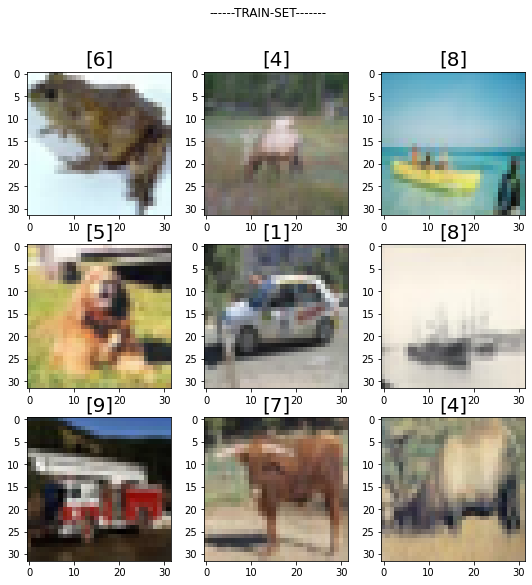

In [ ]:
plot_dataset(X_train_cifar, y_train_cifar, 3,3)

### Testing Dataset

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


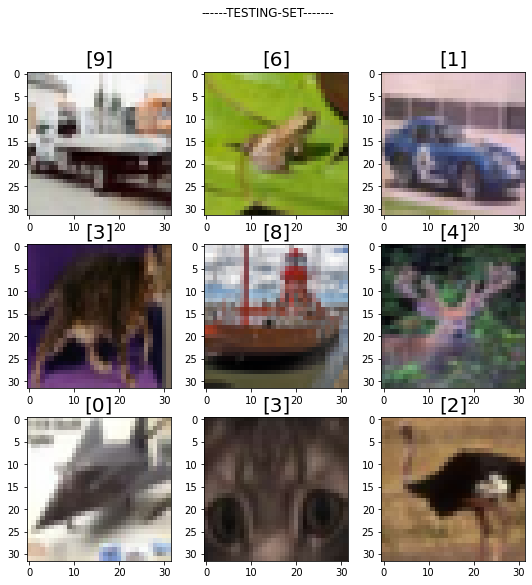

In [ ]:
plot_dataset(X_test_cifar,y_test_cifar,3,3, False)

## Model Architecture 1

In [ ]:
model_32_cifar = get_model_32(input_shape = (32,32,3))
model_32_cifar.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               627300    
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

## Model Training 1

In [ ]:
history_32_cifar = batch_size = 64
epochs = 10

history_32_cifar = model_32_cifar.fit(X_train_cifar,y_train_cifar,
                          batch_size=batch_size,
                          epochs=epochs, 
                          validation_split=0.2,
                          shuffle=True)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 6.5272 - accuracy: 0.2246 - val_loss: 1.9570 - val_accuracy: 0.2842
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 1.7647 - accuracy: 0.3654 - val_loss: 1.7892 - val_accuracy: 0.3641
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 1.5699 - accuracy: 0.4375 - val_loss: 1.6733 - val_accuracy: 0.4128
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 1.4076 - accuracy: 0.4979 - val_loss: 1.6797 - val_accuracy: 0.4186
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 1.2736 - accuracy: 0.5470 - val_loss: 1.7327 - val_accuracy: 0.4270
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 1.1424 - accuracy: 0.5935 - val_loss: 1.8759 - val_accuracy: 0.4201
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 1.0244 - accuracy: 0.6377 - val_loss: 1.9983 - val_accuracy: 0.4066
Epoch 

## Model History

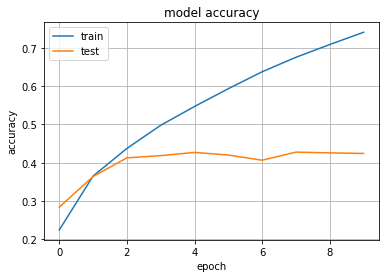

In [ ]:
plt.plot(history_32_cifar.history['accuracy'])
plt.plot(history_32_cifar.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

> Clearly the model ended up horribly Overfitting.  
> To combat this issue, I add a Dropout Layer after every convolution in further archtitectures.







## Model Architecture 1.1
 > Adding Dropout Layers.  
 > Adding Batch Normalization

In [ ]:
def get_model_32(input_shape = (28,28,1)):
    
    model = keras.models.Sequential([

        ## Input Shape
        keras.layers.Input(input_shape),

        ## Convolution 1
        keras.layers.Conv2D(
                            filters=32,
                            kernel_size=(5,5),
                            strides=(1,1),
                            padding='valid',
                            activation='relu'),

        ## Dropout 1
        keras.layers.Dropout(0.25),
        keras.layers.BatchNormalization(),
        ## Pooling 1
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='valid'),
        
        ## Flatten
        keras.layers.Flatten(),

        ## Dense
        keras.layers.Dense(units=100,
                           activation='relu'),
        ## Output
        keras.layers.Dense(units=10,
        activation='softmax')

    ])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [ ]:
model_32_cifar_2 = get_model_32(input_shape = (32,32,3))
model_32_cifar_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 100)              

## Model Training

In [ ]:
history_32_cifar_2 = batch_size = 64
epochs = 10

history_32_cifar_2 = model_32_cifar_2.fit(X_train_cifar,y_train_cifar,
                          batch_size=batch_size,
                          epochs=epochs, 
                          validation_split=0.2,
                          shuffle=True)

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 1.5556 - accuracy: 0.4561 - val_loss: 1.3978 - val_accuracy: 0.5151
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 1.1492 - accuracy: 0.5953 - val_loss: 1.2415 - val_accuracy: 0.5640
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.9883 - accuracy: 0.6538 - val_loss: 1.3566 - val_accuracy: 0.5470
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.8792 - accuracy: 0.6923 - val_loss: 1.2794 - val_accuracy: 0.5764
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.7819 - accuracy: 0.7276 - val_loss: 1.3805 - val_accuracy: 0.5768
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.7029 - accuracy: 0.7535 - val_loss: 1.3876 - val_accuracy: 0.5875
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.6257 - accuracy: 0.7797 - val_loss: 1.3480 - val_accuracy: 0.5960
Epoch 

## Model Architecture 2.1

In [ ]:
def get_model_32_32(input_shape = (28,28,1)):
    
    model = keras.models.Sequential([
        

        keras.layers.Input(input_shape),
        keras.layers.Conv2D(
                            filters=32,
                            kernel_size=(3,3),
                            strides=(1,1),
                            padding='valid',
                            activation='relu'),
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='valid'),
        keras.layers.Dropout(0.25),
        keras.layers.BatchNormalization(),    

        keras.layers.Conv2D(
                            filters=32,
                            kernel_size=(3,3),
                            strides=(1,1),
                            padding='valid',
                            activation='relu'),
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='valid'),
        keras.layers.Dropout(0.25),
        keras.layers.BatchNormalization(), 
        

        keras.layers.Flatten(),

        keras.layers.Dense(units=100,
                           activation='relu'),
        
        keras.layers.Dense(units=10,
        activation='softmax')

    ])

    model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [ ]:
model_32_32_cifar = get_model_32_32(input_shape = (32,32,3))
model_32_32_cifar.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dense_11 (Dense)            (None, 100)              

### Model Training

In [ ]:
batch_size = 64
epochs = 10

history_32_32_cifar = model_32_32_cifar.fit(X_train_cifar,y_train_cifar,
                          batch_size=batch_size,
                          epochs=epochs, 

                          validation_split=0.2,
                          shuffle=True)

Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 2.8871 - accuracy: 0.2251 - val_loss: 1.9191 - val_accuracy: 0.3190
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 1.7859 - accuracy: 0.3601 - val_loss: 1.7220 - val_accuracy: 0.3859
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 1.6149 - accuracy: 0.4194 - val_loss: 1.6912 - val_accuracy: 0.4048
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 1.5047 - accuracy: 0.4618 - val_loss: 1.5292 - val_accuracy: 0.4579
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 1.4186 - accuracy: 0.4937 - val_loss: 1.5321 - val_accuracy: 0.4676
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 1.3481 - accuracy: 0.5211 - val_loss: 1.4338 - val_accuracy: 0.4960
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 1.2833 - accuracy: 0.5457 - val_loss: 1.3706 - val_accuracy: 0.5196
Epoch 

## Model Architecture 3.1

In [ ]:
def get_model_Le_net(input_shape = (28,28,1)):
    
    model = keras.models.Sequential([
        
        ## Input Shape
        keras.layers.Input(input_shape),

        ## Convolution 1
        keras.layers.Conv2D(
                            filters=6,
                            kernel_size=(5,5),
                            strides=(1,1),
                            padding='same',
                            activation='tanh'),
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='same'),
        keras.layers.Dropout(0.20),
        keras.layers.BatchNormalization(),


        ## Convolution 2
        keras.layers.Conv2D(
                            filters=16,
                            kernel_size=(5,5),
                            strides=(1,1),
                            padding='same',
                            activation='tanh'),
        keras.layers.MaxPool2D(
                                pool_size=(2, 2),
                               strides=(2,2),
                               padding='same'),
        keras.layers.Dropout(0.20),
        keras.layers.BatchNormalization(),
        

        ## Flatten
        keras.layers.Flatten(),


        ## Dense 1 , 120
        keras.layers.Dense(units=120,
                           activation='sigmoid'),

        ## Dense 2, 64
        keras.layers.Dense(units=64,
                           activation='sigmoid'),
        
        keras.layers.Dense(units=10,
        activation='softmax')

    ])

    model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [ ]:
model_le_net_cifar = get_model_Le_net((32,32,3))
model_le_net_cifar.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 6)         0         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 6)        24        
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 16)        

### Model Training

In [ ]:
batch_size = 64
epochs = 20

history_model_le_net_cifar = model_le_net_cifar.fit(X_train_cifar,y_train_cifar,
                          batch_size=batch_size,
                          epochs=epochs, 
                          validation_split=0.2,
                          shuffle=True)

Epoch 1/20
625/625 [==============================] - 4s 5ms/step - loss: 1.8730 - accuracy: 0.3362 - val_loss: 1.6887 - val_accuracy: 0.3896
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 1.5888 - accuracy: 0.4321 - val_loss: 1.5585 - val_accuracy: 0.4496
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 1.5020 - accuracy: 0.4622 - val_loss: 1.4450 - val_accuracy: 0.4924
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 1.4428 - accuracy: 0.4843 - val_loss: 1.4297 - val_accuracy: 0.4885
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 1.3995 - accuracy: 0.5013 - val_loss: 1.3588 - val_accuracy: 0.5157
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 1.3682 - accuracy: 0.5117 - val_loss: 1.3746 - val_accuracy: 0.5138
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 1.3312 - accuracy: 0.5256 - val_loss: 1.3090 - val_accuracy: 0.5384
Epoch 

## Saving Models

In [ ]:
import os

path = '/content/CIFAR_model_cp'
os.mkdir(path)

## model 1
path_mdl = os.path.join(path,'model_32_cifar.h5')
path_wts = os.path.join(path,'model_32wts_cifar.h5')

model_32_cifar_2.save(path_mdl)
model_32_cifar_2.save_weights(path_wts)

## model 2
path_mdl = os.path.join(path,'model_32_32_cifar.h5')
path_wts = os.path.join(path,'model_32_32wts_cifar.h5')

model_32_32_cifar.save(path_mdl)
model_32_32_cifar.save_weights(path_wts)

## model 3
path_mdl = os.path.join(path,'model_le_net_cifar.h5')
path_wts = os.path.join(path,'model_le_net_cifar.h5')

model_le_net_cifar.save(path_mdl)
model_le_net_cifar.save_weights(path_wts)

# Model Analysis

## MNIST

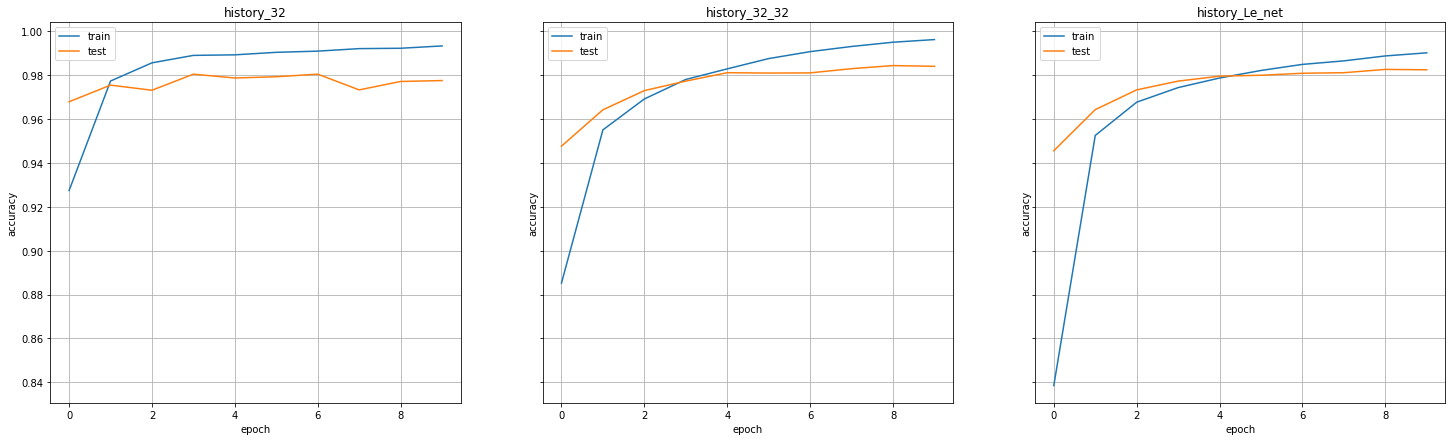

In [ ]:
import matplotlib.pyplot as plt

models_mnist = [history_32,history_32_32,history_Le_net]
models_mnist_lbls = ['history_32','history_32_32','history_Le_net']

plt, axes = plt.subplots(1,3,figsize=(25,7),sharey=True)

for i,history in enumerate(models_mnist):

    axes[i].plot(history.history['accuracy'])
    axes[i].plot(history.history['val_accuracy'])
    axes[i].set_title(models_mnist_lbls[i])
    axes[i].set_ylabel('accuracy')
    axes[i].set_xlabel('epoch')
    axes[i].grid()
    axes[i].legend(['train', 'test'], loc='upper left')

plt.show()

> The 3 Models Demonstrate Similar Performance.  
> They Plateau Test Accuracy at about 98%.  
> The Deep Neural Network does point towards slight overfitting, but given the small size of dataset and high accuracy, this can not be said conclusively

## CIFAR

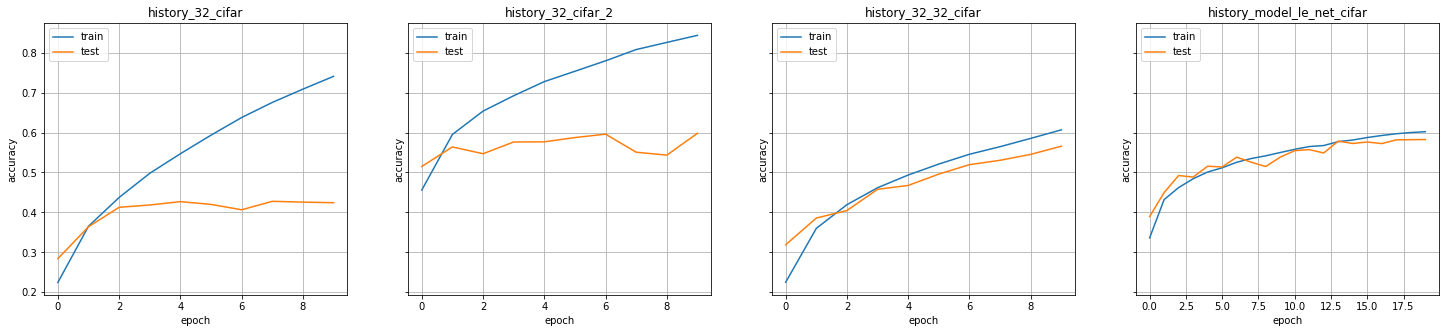

In [ ]:
import matplotlib.pyplot as plt

models_mnist = [history_32_cifar, history_32_cifar_2,history_32_32_cifar,history_model_le_net_cifar]
models_mnist_lbls = ['history_32_cifar','history_32_cifar_2','history_32_32_cifar','history_model_le_net_cifar']

plt, axes = plt.subplots(1,4,figsize=(25,5),sharey=True)

for i,history in enumerate(models_mnist):

    axes[i].plot(history.history['accuracy'])
    axes[i].plot(history.history['val_accuracy'])
    axes[i].set_title(models_mnist_lbls[i])
    axes[i].set_ylabel('accuracy')
    axes[i].set_xlabel('epoch')
    axes[i].grid()
    axes[i].legend(['train', 'test'], loc='upper left')

plt.show()

> The shallow neural networks massively overfit the neural network.  
> This is due to the complexity of features to be learnt, the shallow networks start learning noise in the dataset, rather than trying to create accurate feature maps.  
> Due to this, I add a dropout layers to randomly turn off a few activations during training, this improves performance significantly.  
> The deeper neural networks do seem to better learn the complexity of features better than the shallow networks.  
> They do not overfit the data, visualized by the feature maps below.  
> However, they only have an accuracy of less than 60%.  